<a href="https://colab.research.google.com/github/rawatpremsingh999/tensorflow-coursera/blob/master/coursera_1304.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Improving Computer Vision Accuracy using Convolutions Layers

In [1]:
# import necessary libraries
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

### Using DNN (Deep Neural Network)

In [2]:
# load data
mnist = tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels) = mnist.load_data()

# normalising data
training_images = training_images/255.0
test_images = test_images/255.0

# Design the model
dnn_model = tf.keras.Sequential()
dnn_model.add(keras.layers.Flatten())
dnn_model.add(keras.layers.Dense(128,activation='relu'))
dnn_model.add(keras.layers.Dense(10,activation='softmax'))

# model compilation
dnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# model training
dnn_model.fit(training_images,training_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6281 - accuracy: 0.7807
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3884 - accuracy: 0.8618
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3475 - accuracy: 0.8729
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3098 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2919 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2790 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2644 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2551 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2421 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [3]:
dnn_model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3269 - accuracy: 0.8859


[0.3268657326698303, 0.8859000205993652]

In [4]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## CNN (Convolution Neural Network)

**NOTE:**

*   Convolutions narrow down the content of the image to focus on specific, distinct, details.
*   we take an array (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, we can do things like edge detection
*   we will just train on the highlighted features.
*   **Convolutional Neural Networks:** Add some layers to do convolution before we have the dense layers, and then the information going to the dense layers is more focussed, and possibly more accurate.

In [5]:
# load data
mnist = tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels) = mnist.load_data()

# Reshape 2-D image in 4-D tensor
training_images = training_images.reshape(60000,28,28,1)
test_images     = test_images.reshape(10000,28,28,1)

# normalising data
training_images = training_images/255.0
test_images = test_images/255.0

# Design Network
model = keras.Sequential()
model.add(keras.layers.Conv2D(64,3,activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64,3,activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))


# Define model compilation
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train model
model.fit(training_images,training_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5921 - accuracy: 0.7854
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2995 - accuracy: 0.8889
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2542 - accuracy: 0.9069
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2130 - accuracy: 0.9212
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1888 - accuracy: 0.9301
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1631 - accuracy: 0.9388
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1432 - accuracy: 0.9460
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1267 - accuracy: 0.9529
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1060 - accuracy: 0.9604
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.093

In [6]:
# Test loss and accuracy
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3265 - accuracy: 0.9089


[0.32652023434638977, 0.9089000225067139]

In [7]:
# model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

## Visualising the Convolutions and Poolings



*   print(test_labels[:100]) shows us the first 100 labels in the test set
*   take index 2,3,5 and 97 (all labels are 1)



In [8]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


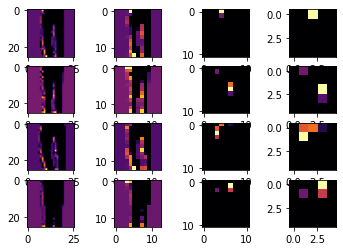

In [9]:
f, axarr = plt.subplots(4,4)

FIRST_IMAGE=2
SECOND_IMAGE=3
THIRD_IMAGE=5
FOURTH_IMAGE=97

CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)
  f4 = activation_model.predict(test_images[FOURTH_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[3,x].imshow(f4[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[3,x].grid(False)

## Play with different number of filters ( 32 or 16)

In [10]:
# load data
mnist = tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels) = mnist.load_data()

# Reshape 2-D image in 4-D tensor
training_images = training_images.reshape(60000,28,28,1)
test_images     = test_images.reshape(10000,28,28,1)

# normalising data
training_images = training_images/255.0
test_images = test_images/255.0

# Design Network
model = keras.Sequential([keras.layers.Conv2D(32,3,activation='relu',input_shape=(28,28,1)),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Conv2D(32,3,activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(64,activation='relu'),
                          keras.layers.Dense(10,activation='softmax')
                          ])

# model compilation
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [11]:
# train the model
model.fit(training_images,training_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6931 - accuracy: 0.7471
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3474 - accuracy: 0.8754
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2907 - accuracy: 0.8940
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2602 - accuracy: 0.9059
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2359 - accuracy: 0.9110
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2146 - accuracy: 0.9208
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1976 - accuracy: 0.9247
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1802 - accuracy: 0.9333
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1728 - accuracy: 0.9356
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.160

In [12]:
# model evaluation
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2880 - accuracy: 0.9006


[0.28795650601387024, 0.900600016117096]

## Add more convolution

In [13]:
# load data
mnist = tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels) = mnist.load_data()

# Reshape 2-D image in 4-D tensor
training_images = training_images.reshape(60000,28,28,1)
test_images     = test_images.reshape(10000,28,28,1)

# normalising data
training_images = training_images/255.0
test_images = test_images/255.0

# Design Network
model = keras.Sequential([keras.layers.Conv2D(64,3,activation='relu',input_shape=(28,28,1)),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Conv2D(64,3,activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Conv2D(64,3,activation='relu'),
                          keras.layers.AveragePooling2D((2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(64,activation='relu'),
                          keras.layers.Dense(10,activation='softmax')
                          ])

# model compilation
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
average_pooling2d (AveragePo (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)               

In [14]:
# train the model
model.fit(training_images,training_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8683 - accuracy: 0.6727
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4570 - accuracy: 0.8345
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3770 - accuracy: 0.8588
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3351 - accuracy: 0.8766
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3017 - accuracy: 0.8878
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2816 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2553 - accuracy: 0.9059
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2463 - accuracy: 0.9077
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2279 - accuracy: 0.9142
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.212

In [15]:
# model evaluation
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3024 - accuracy: 0.8920


[0.3024091422557831, 0.8920000195503235]

## Experiment with single convolution layer

In [16]:
# load data
mnist = tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels) = mnist.load_data()

# Reshape 2-D image in 4-D tensor
training_images = training_images.reshape(60000,28,28,1)
test_images     = test_images.reshape(10000,28,28,1)

# normalising data
training_images = training_images/255.0
test_images = test_images/255.0

# Design Network
model = keras.Sequential([keras.layers.Conv2D(64,3,activation='relu',input_shape=(28,28,1)),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(10,activation='softmax')
                          ])

# model compilation
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


In [17]:
# train the model
model.fit(training_images,training_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5120 - accuracy: 0.8167
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2655 - accuracy: 0.9031
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2143 - accuracy: 0.9212
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1765 - accuracy: 0.9351
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1509 - accuracy: 0.9441
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1229 - accuracy: 0.9551
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0971 - accuracy: 0.9641
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0832 - accuracy: 0.9698
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0667 - accuracy: 0.9754
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.055

In [18]:
# model evaluation
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3373 - accuracy: 0.9142


[0.337332546710968, 0.9142000079154968]

## **Stop Training** at certain level of accuracy

In [19]:
# load data
mnist = tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels) = mnist.load_data()

# Reshape 2-D image in 4-D tensor
training_images = training_images.reshape(60000,28,28,1)
test_images     = test_images.reshape(10000,28,28,1)

# normalising data
training_images = training_images/255.0
test_images = test_images/255.0

# Design stopping criterion - callback
class mycallback(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nReached at 98% accuracy so cancelling training!")
      self.model.stop_training = True

callback = mycallback()


# Design Network
model = keras.Sequential([keras.layers.Conv2D(128,3,activation='relu',input_shape=(28,28,1)),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(10,activation='softmax')
                          ])

# model compilation
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# train the model
model.fit(training_images,training_labels,epochs=50,callbacks=[callback])

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4777 - accuracy: 0.8298
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2494 - accuracy: 0.9080
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1939 - accuracy: 0.9290
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1580 - accuracy: 0.9416
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1270 - accuracy: 0.9526
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1032 - accuracy: 0.9625
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0825 - accuracy: 0.9693
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0663 - accuracy: 0.9756
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0538 - accuracy: 0.9804
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.049

In [20]:
# model evaluation
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3809 - accuracy: 0.9120


[0.38087189197540283, 0.9120000004768372]

In [21]:
# model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               2769024   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 2,771,594
Trainable params: 2,771,594
Non-trainable params: 0
_________________________________________________________________
